# Prosper Loan Data
## by Luvie Curby

## Investigation Overview

> My main investigation is to see how the borrower's characteristics changed overtime as its business model and the larger lending environment evolved. The Loan Origination Quarter is critical feature base line. I am most interested to see the Loan Origination Quarter and how the market loan company's data and find insights related to the borrowers, the loan they lend and the grade represents the borrower's credit score, annual income, and among other things.

## Dataset Overview

> The dataset contains 113,937 loans with 81 variables. The loan listings are from late 2005 - 2014 with various characteristics of those loans. My selected data consisted of 8 discrete variables and 6 continuous variables. 

> Discrete Variables: LoanOriginationQuarter, ListingCategory, EmploymentStatus, IsBorrowerHomeowner, CreditGrade, IncomeRange, IncomeVerifiable, and Term.

> Continuous Variables: LoanOriginalAmount, BorrowerRate, DebtToIncomeRation, CreditScoreRangeLower, StatedMonthlyIncome, and  ProsperRating.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import matplotlib.patches as mpatches

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosperLoanData = pd.read_csv('prosperLoanData.csv')

Fist, we need to understand the number of loans in categorical type to display date series order.

## Distribution of Loan Origination Quarter

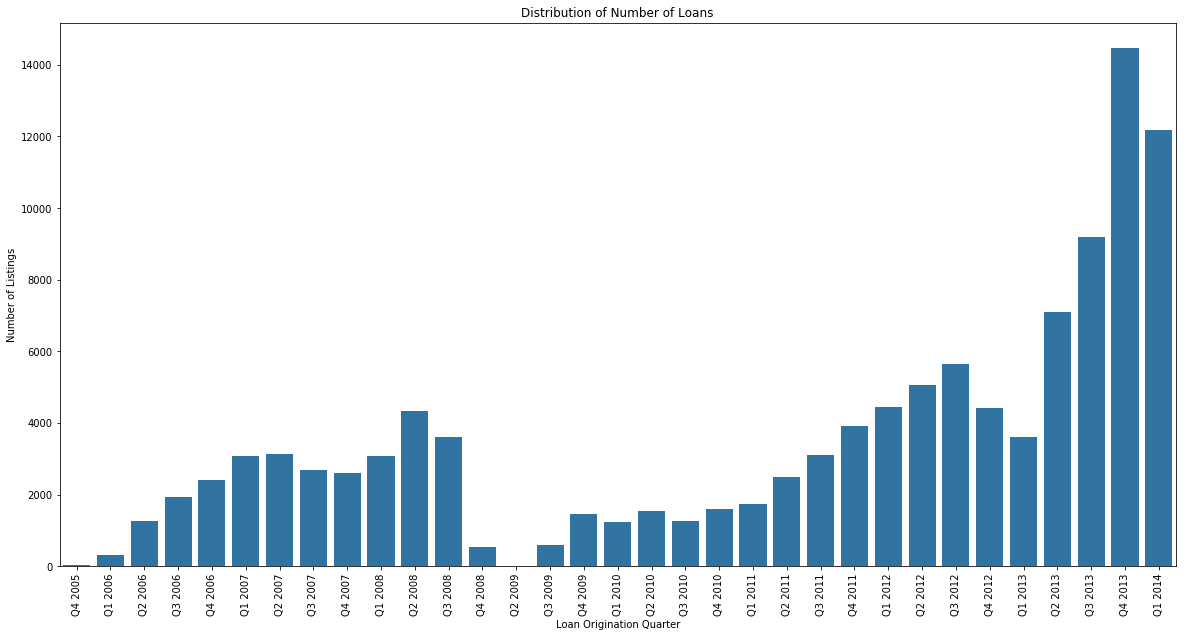

In [3]:
#univariate polt of loan origination quarter in categorical order type
quarter = ['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
          'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
          'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014']
qrt_cat = pd.api.types.CategoricalDtype(ordered = True, categories = quarter)
prosperLoanData['LoanOriginationQuarter'] = prosperLoanData['LoanOriginationQuarter'].astype(qrt_cat)

prosperLoanData = prosperLoanData.loc[prosperLoanData['LoanOriginationQuarter'].isin(['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
          'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
          'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014'])]

plt.figure(figsize=(20,10))
base_color = sb.color_palette()[0]
ax=sb.countplot(data=prosperLoanData, x='LoanOriginationQuarter', color=base_color)
plt.title('Distribution of Number of Loans')
plt.xlabel('Loan Origination Quarter')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90);

By looking at this graph, Prosper took 3 years for listing levels to reach the Q2 2008. Then, there is a big dip from Q4 2008-2009, even until 2010. After doing some research on Wikipedia, this time period concurs with the fall of the market in Fall 2008 with the huge effect by the collapse of the major investment firm Lehman Brothers and, the succeeding fallout in the global financial system. It appears the Prosper business was susceptible to the global economic crisis. I'm wondering if Prosper did any changes with the credit policies due to the economic crisis. We'll check this one later.

## Distribution of Loan Original Amount

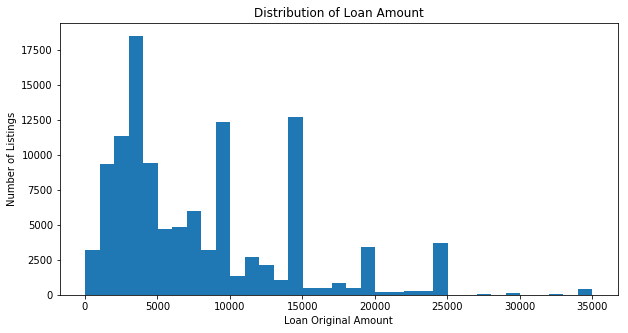

In [4]:
#univariate plot of loan original amount
plt.figure(figsize=(10,5))
bins = np.arange(20, prosperLoanData['LoanOriginalAmount'].max()+1000,1000)
plt.hist(prosperLoanData['LoanOriginalAmount'], bins = bins)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Original Amount')
plt.ylabel('Number of Listings');

In [5]:
#check the average loan amount
prosperLoanData['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

The loan amounts skew relatively small, with the median of 6,500 dollars less than mean of 8,337. It shows the most loans are in less than $10,000. 

## Distribution of Borrower Interest Rate

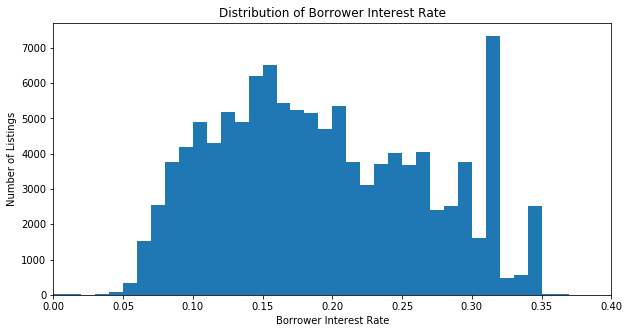

In [4]:
# univariate plot of borrower rate on a standard scale
binsize = 0.01
bins = np.arange(0, prosperLoanData ['BorrowerRate'].max()+binsize, binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = prosperLoanData, x = 'BorrowerRate', bins = bins)
plt.xlim(0, 0.4)
plt.title('Distribution of Borrower Interest Rate')
plt.xlabel('Borrower Interest Rate')
plt.ylabel('Number of Listings')
plt.show()

In [7]:
#check the average borrower rate 
prosperLoanData['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

The interest rates are high, averaging 18%. There is a large number of loans with interest rate over 30%. 

## Loan Amount vs. Interest Rate

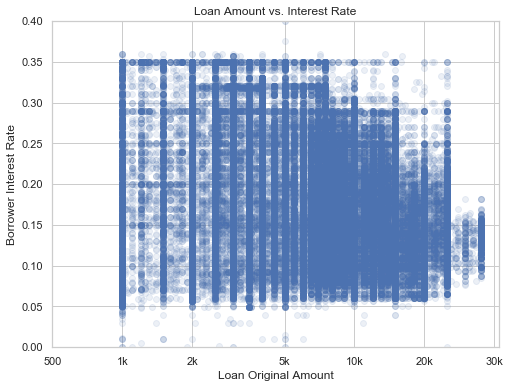

In [4]:
#bivariate plot of loan original amount vs borrower interest rate
plt.figure(figsize = [8, 6])
sns.set(style="whitegrid")
plt.scatter(data = prosperLoanData, x = 'LoanOriginalAmount', y = 'BorrowerRate', alpha = 1/10)
plt.ylim([0, 0.4])
plt.ylabel('Borrower Interest Rate')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4], ['500', '1k', '2k', '5k', '10k', '20k', '30k'])
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Original Amount')
plt.show()

The high interest rates > 20% mostly applied on the smaller loans, expected lower interest rate on larger loans.

## Loan Amount vs. Credit Score

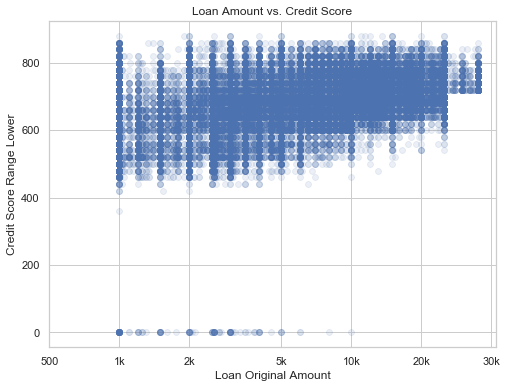

In [7]:
#bivariate plot of loan original amount vs crredit score
plt.figure(figsize = [8, 6])
sns.set(style="whitegrid")
plt.scatter(data = prosperLoanData, x = 'LoanOriginalAmount', y = 'CreditScoreRangeLower', alpha = 1/10)
plt.ylabel('Credit Score Range Lower')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4], ['500', '1k', '2k', '5k', '10k', '20k', '30k'])
plt.title('Loan Amount vs. Credit Score')
plt.xlabel('Loan Original Amount')
plt.show()

In [43]:
prosperLoanData['CreditScoreRangeLower'].describe()

count    113346.000000
mean        685.567731
std          66.458275
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

In [44]:
prosperLoanData['CreditScoreRangeUpper'].describe()

count    113346.000000
mean        704.567731
std          66.458275
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64

The larger the loan, the higher the credit score. The credit score range upper has very similar distribution to lower range but 19 points higher.

## Loan Amount vs. Credit Grade

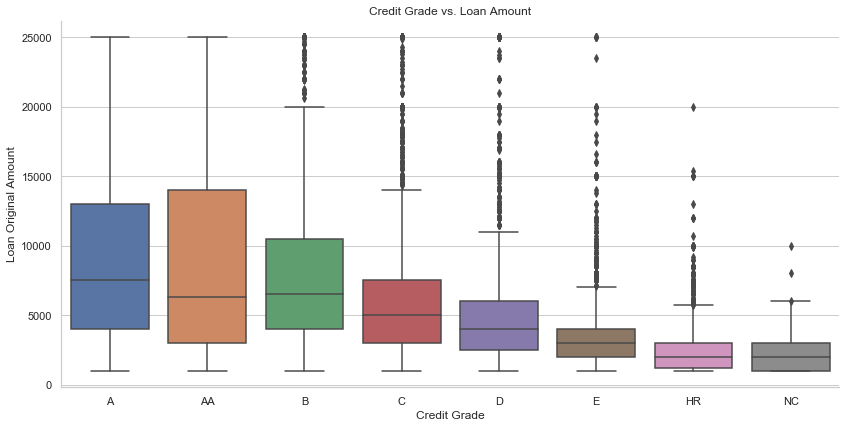

In [17]:
#bivariate plot of loan original amount vs credit grade in an order categorical type high grade to low grade
grade = ['A', 'AA', 'B', 'C', 'D', 'E', 'HR','NC']
grade_cat = pd.api.types.CategoricalDtype(ordered = True, categories = grade)
prosperLoanData['CreditGrade'] = prosperLoanData['CreditGrade'].astype(grade_cat)

prosperLoanData = prosperLoanData.loc[prosperLoanData['CreditGrade'].isin(['A', 'AA', 'B', 'C', 'D', 'E', 'HR','NC'])]

sns.set(style="whitegrid")
sns.catplot(x='CreditGrade', y='LoanOriginalAmount', kind="box", data=prosperLoanData, height=6, aspect=2);
plt.title('Credit Grade vs. Loan Amount')
plt.xlabel('Credit Grade')
plt.ylabel('Loan Original Amount');

This demonstrates the larger loan amounts have better credit grades (A-AA-B).

## Stated Monthly Income vs. Debt To Income Ratio

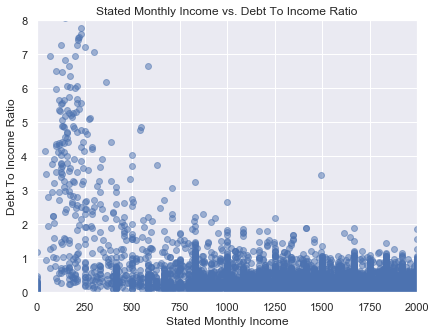

In [23]:
#bivariate plot of stated monthly income vs debt to income ratio
plt.figure(figsize = [15,5])
sns.set(style="darkgrid")
plt.subplot(1,2,1)
sb.regplot(data = prosperLoanData, x = 'StatedMonthlyIncome', y = 'DebtToIncomeRatio', fit_reg = False,
          x_jitter = 0.01, y_jitter = 0.01, scatter_kws = {'alpha':1/2})
plt.xlim(0, 2000)
plt.ylim(0, 8)
plt.title('Stated Monthly Income vs. Debt To Income Ratio')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Debt To Income Ratio');

Most of the borrowers with lower monthly income towards below $500 have higher debt to income ratio. It seems they take on larger loans.

## Prosper Rating vs. Debt To Income Ratio

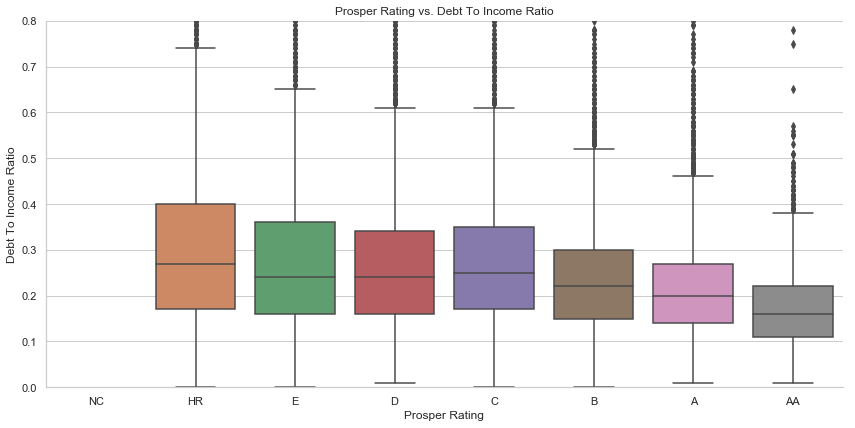

In [24]:
#bivariate plot of debt to income ratio vs prosper rating in order categorical type from riskiest to less risky
pros_rate = ['NC', 'HR', 'E', 'D', 'C', 'B', 'A','AA']
rate_cat = pd.api.types.CategoricalDtype(ordered = True, categories = pros_rate)
prosperLoanData['ProsperRating (Alpha)'] = prosperLoanData['ProsperRating (Alpha)'].astype(rate_cat)

prosperLoanData = prosperLoanData.loc[prosperLoanData['ProsperRating (Alpha)'].isin(['NC', 'HR', 'E', 'D', 'C', 'B', 'A','AA'])]

sns.set(style='whitegrid')
sns.catplot(x='ProsperRating (Alpha)', y='DebtToIncomeRatio', kind='box', data=prosperLoanData, height=6, aspect=2);
plt.ylim(0, 0.8)
plt.title('Prosper Rating vs. Debt To Income Ratio')
plt.xlabel('Prosper Rating')
plt.ylabel('Debt To Income Ratio');

While there appears to be some relationship between a low DTI ratio and a good Prosper Rating (AA, A, B), for riskier loans the mean DTI is roughly the same across the board. Clearly, other factors influence the Prosper rating.

## Employment Status vs. Loan Amount

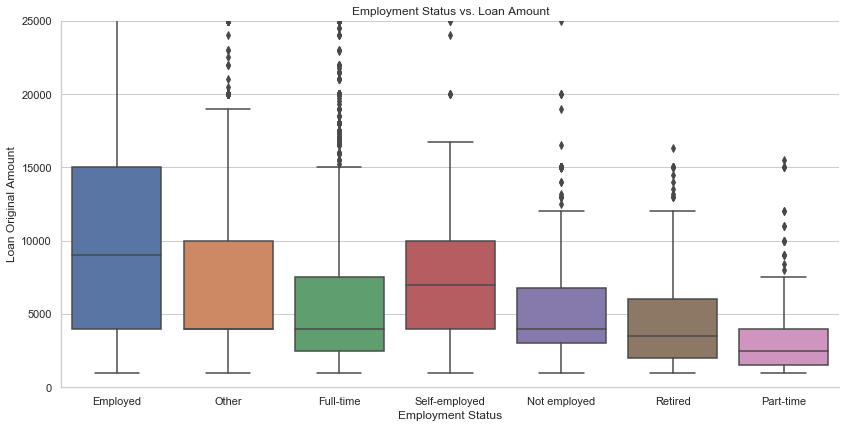

In [25]:
#bivariate plot of employment status and loan original amount
sns.set(style="whitegrid")
sns.catplot(x='EmploymentStatus', y='LoanOriginalAmount', kind='box', data=prosperLoanData, height=6, aspect=2);
plt.ylim(0, 25000)
plt.title('Employment Status vs. Loan Amount')
plt.xlabel('Employment Status')
plt.ylabel('Loan Original Amount');

In [45]:
prosperLoanData['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [46]:
prosperLoanData['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

Most of the borrowers are employed which is 59% and with highest loan amount. 24% are working full-time. Interesting to see the self-employed is second highest with loan amount (not accounting the "Other".) Since personal loans for self-employed are harder to get, borrowers must have extra qualification to convince the lender to approve a request for money. 50% of the borrowers are homeowners.

## Loan Origination Quarter vs. Credit Score

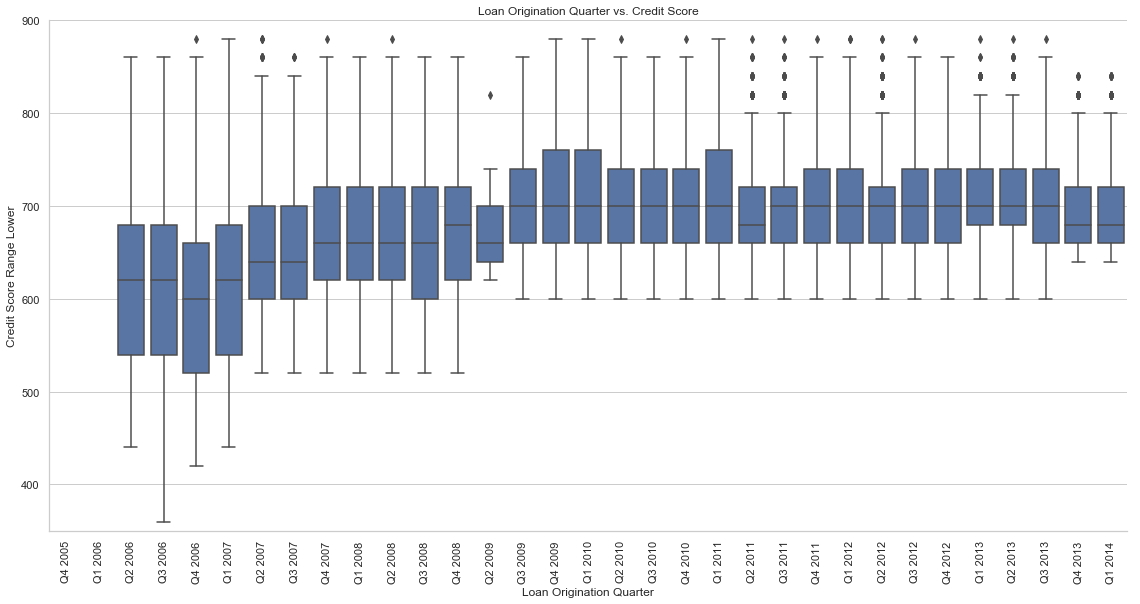

In [4]:
#bivariate plot of credit score range lower and loan origination quarter in order categorical type
quarter = ['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
          'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
          'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014']
qrt_cat = pd.api.types.CategoricalDtype(ordered = True, categories = quarter)
prosperLoanData['LoanOriginationQuarter'] = prosperLoanData['LoanOriginationQuarter'].astype(qrt_cat)

prosperLoanData = prosperLoanData.loc[prosperLoanData['LoanOriginationQuarter'].isin(['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
          'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
          'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014'])]

base_color = sb.color_palette()[0]
sns.set(style="whitegrid")
sns.catplot(x='LoanOriginationQuarter', y='CreditScoreRangeLower', kind="box", data=prosperLoanData, height=8, aspect=2, color=base_color);
plt.ylim(350, 900)
plt.title('Loan Origination Quarter vs. Credit Score')
plt.xlabel('Loan Origination Quarter')
plt.ylabel('Credit Score Range Lower')
plt.xticks(rotation=90);

In [43]:
prosperLoanData['CreditScoreRangeLower'].value_counts()

680.0    16492
660.0    16366
700.0    15471
720.0    12923
640.0    12199
740.0     9267
760.0     6606
780.0     4624
620.0     4172
600.0     3602
800.0     2644
520.0     1593
540.0     1474
820.0     1409
560.0     1357
580.0     1125
840.0      567
500.0      554
480.0      346
860.0      212
460.0      141
0.0        133
440.0       36
880.0       27
420.0        5
360.0        1
Name: CreditScoreRangeLower, dtype: int64

Looking at the credit score over time, it is clear that Prosper changed its policies from one that had no minimum credit score to one that had very strict lower limits. That lower limit rose over time from 520 in Q2 2007 to 600 in Q3 2009 (after the credit crisis) to 640 most recently.

## Loan Origination Quarter vs. Loan Amount

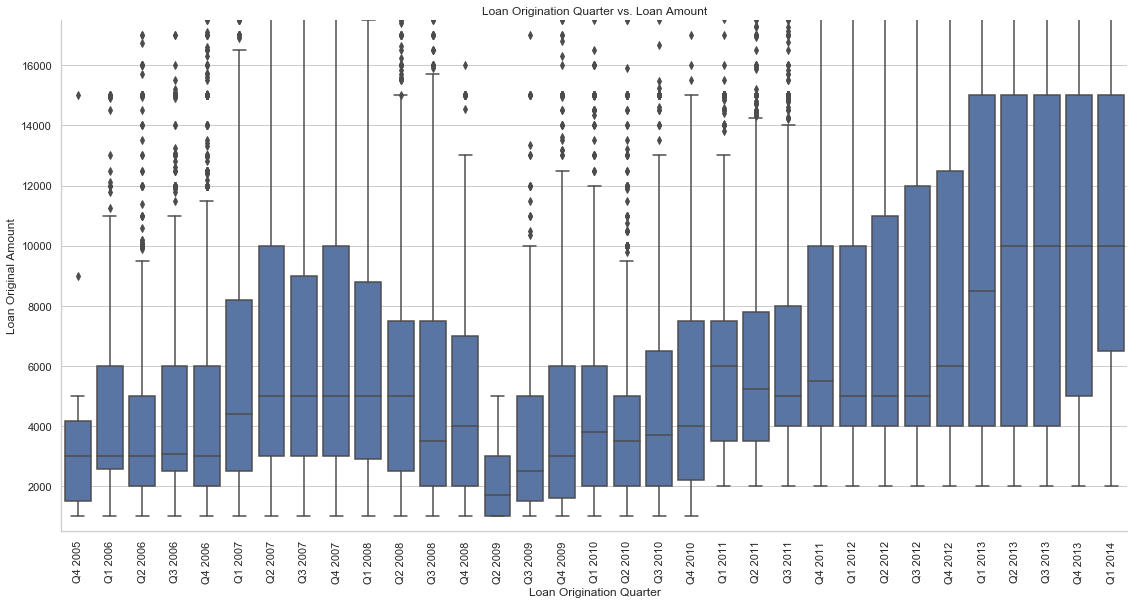

In [30]:
#bivariate plot of loan original amount and loan origination quarter in order categorical type
quarter = ['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
          'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
          'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014']
qrt_cat = pd.api.types.CategoricalDtype(ordered = True, categories = quarter)
prosperLoanData['LoanOriginationQuarter'] = prosperLoanData['LoanOriginationQuarter'].astype(qrt_cat)

prosperLoanData = prosperLoanData.loc[prosperLoanData['LoanOriginationQuarter'].isin(['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
          'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
          'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014'])]

base_color = sb.color_palette()[0]
sns.set(style="whitegrid")
sns.catplot(x='LoanOriginationQuarter', y='LoanOriginalAmount', kind="box", data=prosperLoanData, height=8, aspect=2, color=base_color);
plt.ylim(500, 17500)
plt.title('Loan Origination Quarter vs. Loan Amount')
plt.xlabel('Loan Origination Quarter')
plt.ylabel('Loan Original Amount')
plt.xticks(rotation=90);

From the prior graph credit score when Prosper changed its policies, the loan amount rose over time after the credit crisis.

## Loan Amount vs. Term

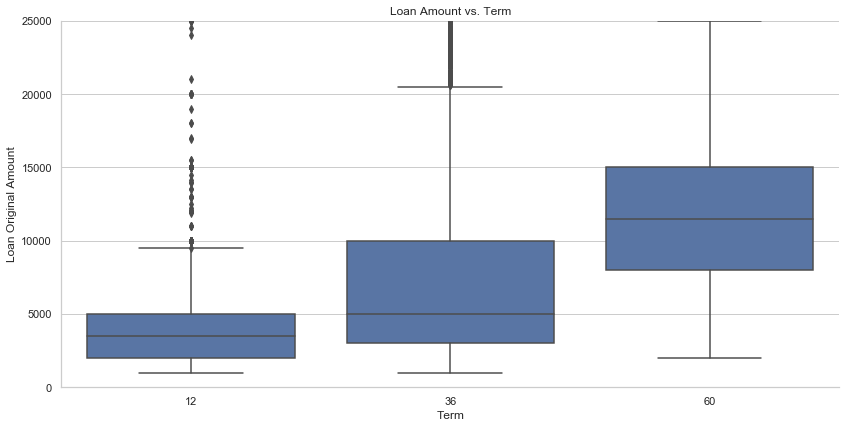

In [31]:
#bivariate plot of term and loan original amount
base_color = sb.color_palette()[0]
sns.set(style="whitegrid")
sns.catplot(x='Term', y='LoanOriginalAmount', kind="box", data=prosperLoanData, height=6, aspect=2, color=base_color);
plt.ylim(0, 25000)
plt.title('Loan Amount vs. Term')
plt.xlabel('Term')
plt.ylabel('Loan Original Amount');

Majority of loan term is 36. As the term is longer, the loan amounts are larger.

## Term vs. Interest Rate

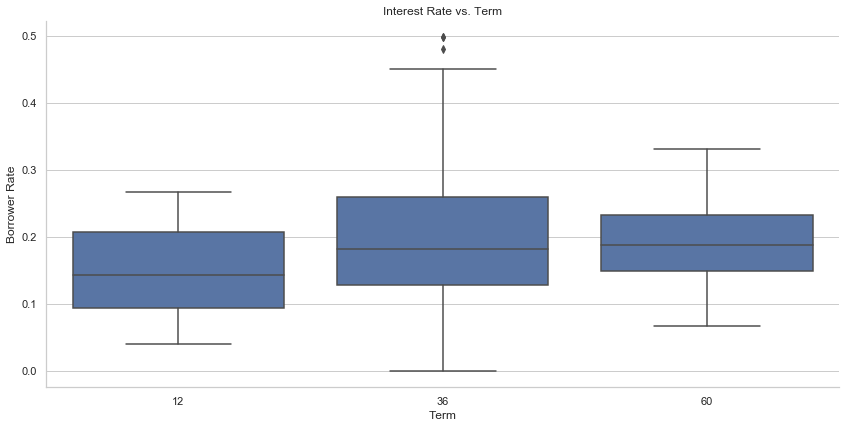

In [32]:
#bivariate plot of term and borrower interest rate
base_color = sb.color_palette()[0]
sns.set(style="whitegrid")
sns.catplot(x='Term', y='BorrowerRate', kind="box", data=prosperLoanData, height=6, aspect=2, color=base_color);
plt.title('Interest Rate vs. Term')
plt.xlabel('Term')
plt.ylabel('Borrower Rate');

In [54]:
prosperLoanData['Term'].describe()

count    113937.000000
mean         40.830248
std          10.436212
min          12.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: Term, dtype: float64

The 3 year term is not necessarily more expensive. The mean interest rate moves up slightly at the 5 year term and the variance is smaller.

Let's see some loan characteristics and their performance in over time.

## Loan Quarter by Count and Loan Category

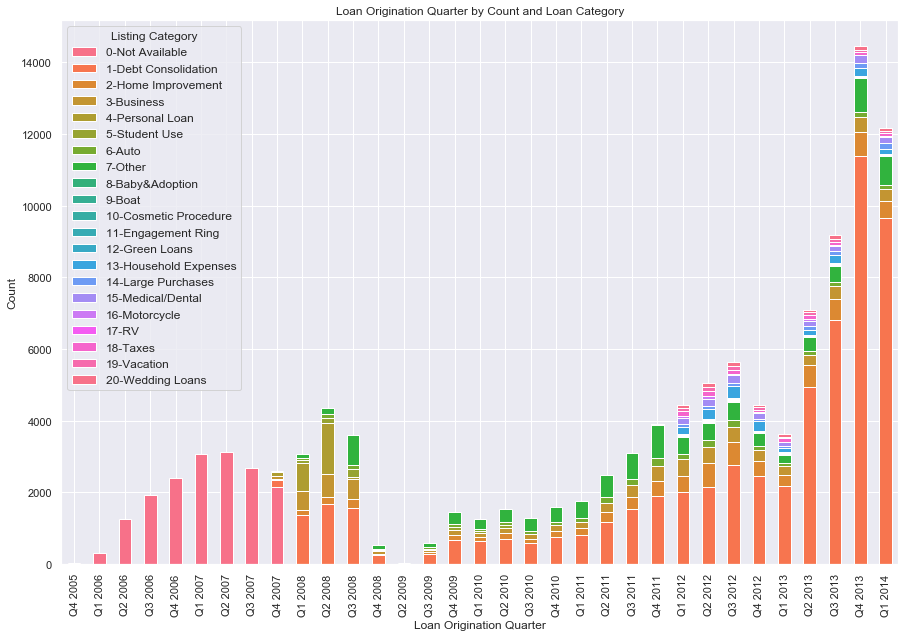

In [35]:
#multivariate plot of listing category and counts per over time, create legend label descriptions
df_plot = prosperLoanData.groupby(['ListingCategory', 'LoanOriginationQuarter']).size().reset_index().pivot(columns='ListingCategory', 
                                index='LoanOriginationQuarter', values=0)
df_plot.plot(kind='bar', stacked=True)

plt.legend(['0-Not Available', '1-Debt Consolidation', '2-Home Improvement', '3-Business', '4-Personal Loan', 
              '5-Student Use', '6-Auto', '7-Other', '8-Baby&Adoption', '9-Boat', '10-Cosmetic Procedure', 
              '11-Engagement Ring', '12-Green Loans', '13-Household Expenses', '14-Large Purchases','15-Medical/Dental', 
              '16-Motorcycle', '17-RV', '18-Taxes', '19-Vacation', '20-Wedding Loans'], title='Listing Category', fontsize='12')

sns.set(rc={'figure.figsize':(15, 10)})
sns.set_palette('husl', 20)
plt.title('Loan Origination Quarter by Count and Loan Category')
plt.ylabel('Count')
plt.xlabel('Loan Origination Quarter');

Prior to 2008, it looks like prosper did not capture the loan category, and debt consolidation dominated the category subsequently every year. Let's go back to the interest rate with spikes over 30%. Since most of the loans are for debt consolidation, the high rates must still be better than the interest rates the borrowers would have to pay to credit card companies. Or, could be the borrowers see value in freeing up the borrowing limit on their credit cards, even if it means paying high rates to Prosper lenders.

## Loan Quarter by Count and Income Range

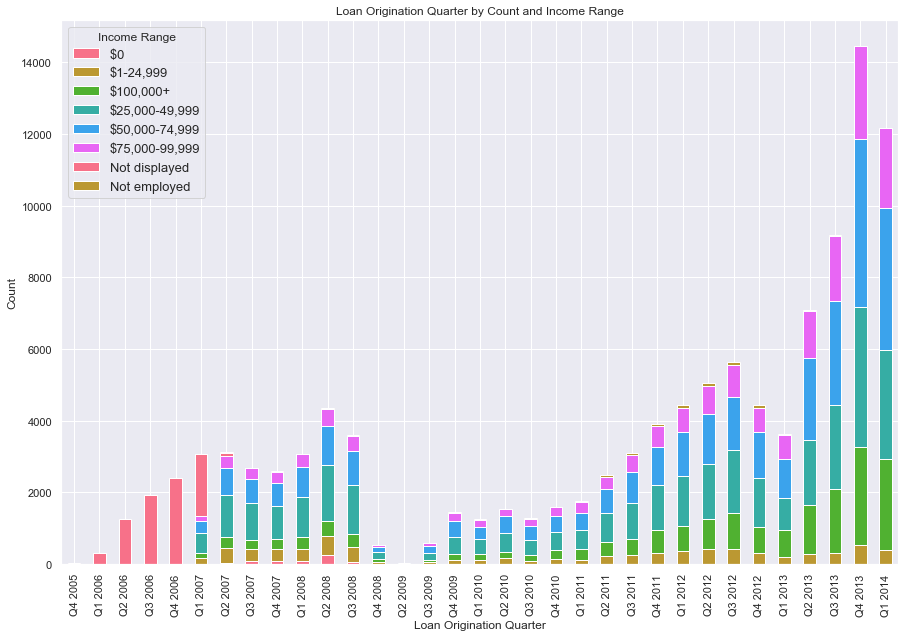

In [36]:
#multivariate plot of income range and count per over time in order categorical type
quarter = ['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
          'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
          'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014']
qrt_cat = pd.api.types.CategoricalDtype(ordered = True, categories = quarter)
prosperLoanData['LoanOriginationQuarter'] = prosperLoanData['LoanOriginationQuarter'].astype(qrt_cat)

prosperLoanData = prosperLoanData.loc[prosperLoanData['LoanOriginationQuarter'].isin(['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
          'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
          'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014'])]

sns.set(rc={'figure.figsize':(15, 10)})
sns.set_palette('husl')
qrt_plot = prosperLoanData.groupby(['IncomeRange', 'LoanOriginationQuarter']).size().reset_index().pivot(columns='IncomeRange', 
                                index='LoanOriginationQuarter', values=0)
qrt_plot.plot(kind='bar', stacked=True)
plt.legend(title='Income Range', fontsize='13')
plt.title('Loan Origination Quarter by Count and Income Range')
plt.ylabel('Count')
plt.xlabel('Loan Origination Quarter');

It looks like the income ranges uptick in loans in 2012-2013. It grew initially in 50k-75k, 75k-100k, and 100k+.

## Loan Quarter by Interest Rate and Term

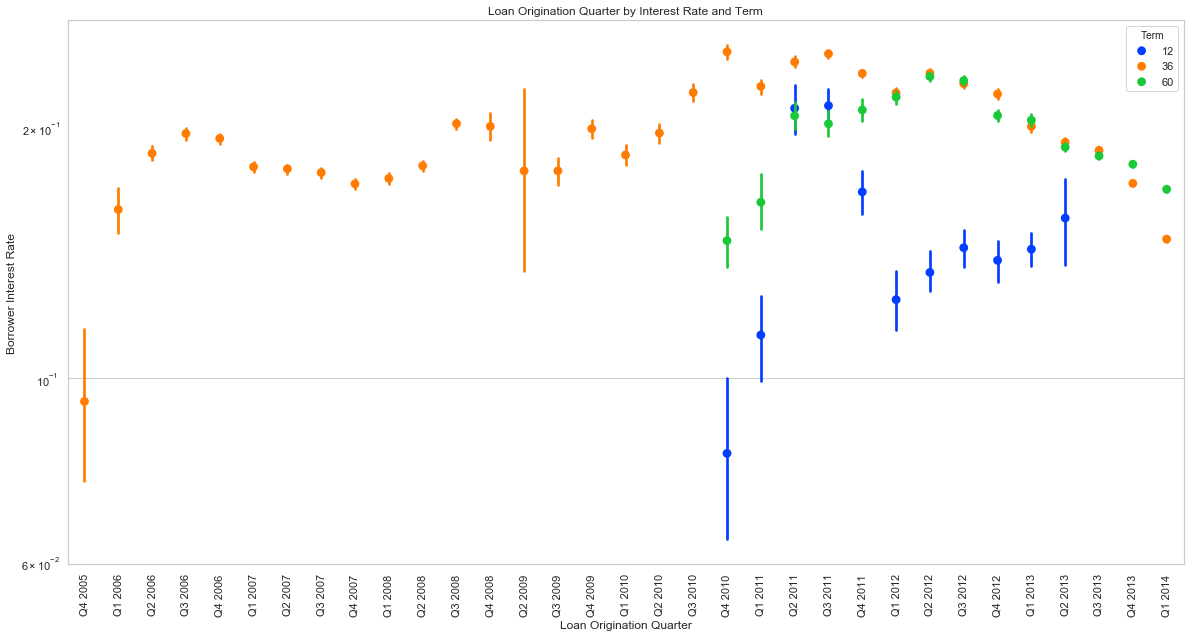

In [38]:
#multivariate plot of interest rate and term per over time in order categorical type 
quarter = ['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
          'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
          'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014']
qrt_cat = pd.api.types.CategoricalDtype(ordered = True, categories = quarter)
prosperLoanData['LoanOriginationQuarter'] = prosperLoanData['LoanOriginationQuarter'].astype(qrt_cat)

prosperLoanData = prosperLoanData.loc[prosperLoanData['LoanOriginationQuarter'].isin(['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
          'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
          'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014'])]

fig = plt.figure(figsize = [20,10])
sns.set(style="whitegrid")
ax = sb.pointplot(data = prosperLoanData, x = 'LoanOriginationQuarter', y = 'BorrowerRate', hue = 'Term',  
           palette = 'bright', linestyles = '')
plt.title('Loan Origination Quarter by Interest Rate and Term')
plt.ylabel('Borrower Interest Rate')
plt.xlabel('Loan Origination Quarter')
plt.yscale('log')
plt.xticks(rotation=90);

A dodge point plot shows the clear influence of borrower interest rate and term in over time when Prosper changed its policies and improved the overall risk profile of it's loans. There is a correlation between interest rate and terms (36 and 60) from year 2012 to 2014 where shows the 36 term is not necessarily more expensive.

## Loan Status by Count and Loan Category

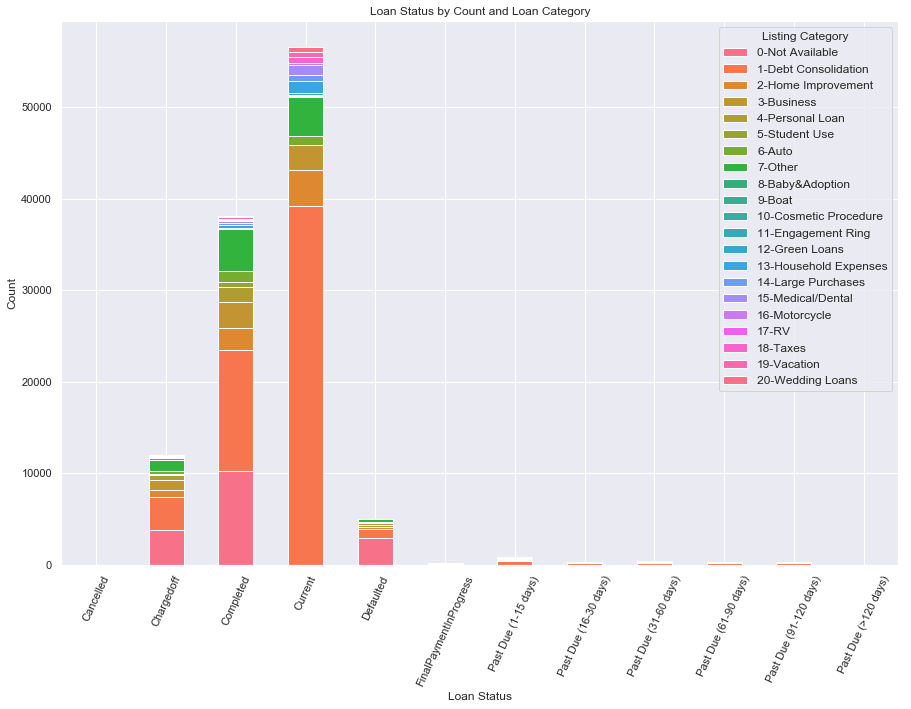

In [39]:
#multivariate plot of listing category and count per loan status, create legend label descriptions
sns.set(rc={'figure.figsize':(15, 10)})
sns.set_palette('husl', 20)
df_plot = prosperLoanData.groupby(['ListingCategory', 'LoanStatus']).size().reset_index().pivot(columns='ListingCategory', 
                                index='LoanStatus', values=0)
df_plot.plot(kind='bar', stacked=True)

plt.legend(['0-Not Available', '1-Debt Consolidation', '2-Home Improvement', '3-Business', '4-Personal Loan', 
              '5-Student Use', '6-Auto', '7-Other', '8-Baby&Adoption', '9-Boat', '10-Cosmetic Procedure', 
              '11-Engagement Ring', '12-Green Loans', '13-Household Expenses', '14-Large Purchases','15-Medical/Dental', 
              '16-Motorcycle', '17-RV', '18-Taxes', '19-Vacation', '20-Wedding Loans'], title='Listing Category', fontsize='12')
plt.title('Loan Status by Count and Loan Category')
plt.ylabel('Count')
plt.xlabel('Loan Status')
plt.xticks(rotation=65);

Per loan status, it demonstrates the majority of the completed and current loans are the debt consolidations.

## Loan Amount by Interest Rate and Credit Score

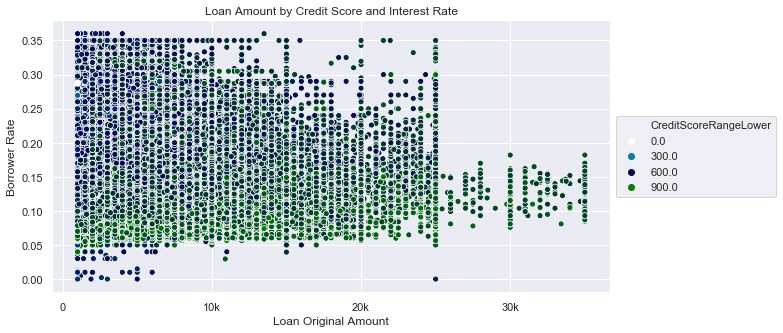

In [40]:
#multivariate plot of interest rate and credit score per loan amount
plt.figure(figsize = [10, 5])
sns.scatterplot(x='LoanOriginalAmount', y='BorrowerRate', hue='CreditScoreRangeLower', palette='ocean_r', data=prosperLoanData);
plt.xticks([0, 1e4, 2e4, 3e4], ['0', '10k', '20k', '30k'])
plt.title('Loan Amount by Credit Score and Interest Rate')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower Rate')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

The borrowers with high credit scores are with lower interest rates and mostly with larger loan amounts (bottom right.)

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle